# AI 201 Mini Project
## Coffee Match: Leveraging Machine Learning for Coffee Bean Recommendations Using Taste Profiles

Submitted by: 
Jan Lendl R. Uy, 2019-00312

### Download the necessary packages

In [27]:
%pip install pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset as a dataframe

In [29]:
df = pd.read_csv("datasets/merged_data_cleaned.csv")

In [30]:
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


### Format column names in snake-case

In [31]:
# Function to convert to snake case
def to_snake_case(name):
    # Replace dots and spaces with underscore
    name = name.replace('.', '_').replace(' ', '_')
    # Remove any double underscores
    name = name.replace('__', '_')
    # Convert to lowercase
    return name.lower()

In [32]:
# Get current columns and create a mapping dictionary
column_mapping = {col: to_snake_case(col) for col in df.columns}

# Rename the columns
df = df.rename(columns=column_mapping)

In [33]:
print(df.columns)

Index(['unnamed:_0', 'species', 'owner', 'country_of_origin', 'farm_name',
       'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region',
       'producer', 'number_of_bags', 'bag_weight', 'in_country_partner',
       'harvest_year', 'grading_date', 'owner_1', 'variety',
       'processing_method', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body',
       'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points',
       'total_cup_points', 'moisture', 'category_one_defects', 'quakers',
       'color', 'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')


In [34]:
columns_to_drop = [
    "unnamed:_0",  # unnamed index column
    "certification_address", 
    "certification_contact",
    "ico_number",
    "lot_number",
    "expiration"
]

df = df.drop(columns_to_drop, axis=1)

In [35]:
print(df.columns)

Index(['species', 'owner', 'country_of_origin', 'farm_name', 'mill', 'company',
       'altitude', 'region', 'producer', 'number_of_bags', 'bag_weight',
       'in_country_partner', 'harvest_year', 'grading_date', 'owner_1',
       'variety', 'processing_method', 'aroma', 'flavor', 'aftertaste',
       'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness',
       'cupper_points', 'total_cup_points', 'moisture', 'category_one_defects',
       'quakers', 'color', 'category_two_defects', 'certification_body',
       'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters',
       'altitude_mean_meters'],
      dtype='object')


## Initial exploratory data analysis

In [36]:
# Basic information about the dataset
print(df.info())  # Data types and null values
print(df.describe())  # Statistical summary of numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   species               1339 non-null   object 
 1   owner                 1332 non-null   object 
 2   country_of_origin     1338 non-null   object 
 3   farm_name             980 non-null    object 
 4   mill                  1021 non-null   object 
 5   company               1130 non-null   object 
 6   altitude              1113 non-null   object 
 7   region                1280 non-null   object 
 8   producer              1107 non-null   object 
 9   number_of_bags        1339 non-null   int64  
 10  bag_weight            1339 non-null   object 
 11  in_country_partner    1339 non-null   object 
 12  harvest_year          1292 non-null   object 
 13  grading_date          1339 non-null   object 
 14  owner_1               1332 non-null   object 
 15  variety              

In [37]:
# Check for missing values
print(df.isnull().sum())

species                   0
owner                     7
country_of_origin         1
farm_name               359
mill                    318
company                 209
altitude                226
region                   59
producer                232
number_of_bags            0
bag_weight                0
in_country_partner        0
harvest_year             47
grading_date              0
owner_1                   7
variety                 226
processing_method       170
aroma                     0
flavor                    0
aftertaste                0
acidity                   0
body                      0
balance                   0
uniformity                0
clean_cup                 0
sweetness                 0
cupper_points             0
total_cup_points          0
moisture                  0
category_one_defects      0
quakers                   1
color                   270
category_two_defects      0
certification_body        0
unit_of_measurement       0
altitude_low_meters 

### Cupper Points per Region

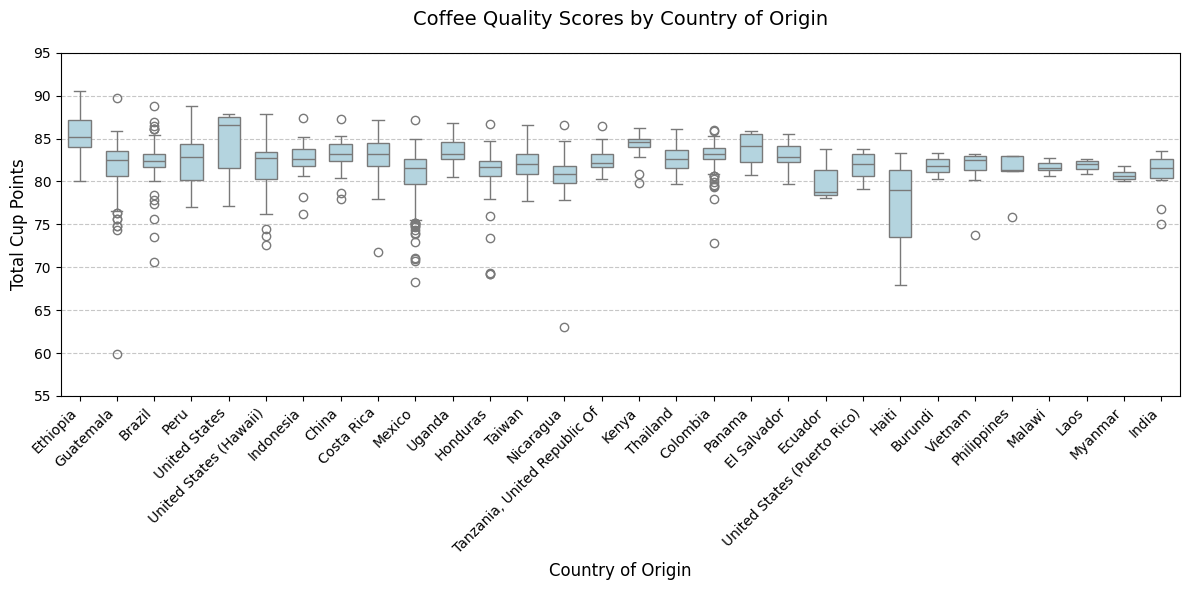

In [51]:
# First, let's filter for countries with more than a minimum number of samples
# This will help reduce clutter
min_samples = 2  # adjust this threshold as needed
country_counts = df['country_of_origin'].value_counts()
countries_to_include = country_counts[country_counts >= min_samples].index

# Filter the dataframe
df_filtered = df[df['country_of_origin'].isin(countries_to_include)]

# Create the plot with better formatting
plt.figure(figsize=(12, 6))  # Increase figure size

# Create boxplot with customized style
sns.boxplot(data=df_filtered, 
            x='country_of_origin', 
            y='total_cup_points',
            color='lightblue',  # Add subtle color
            width=0.6)  # Adjust box width

# Customize the plot
plt.title('Coffee Quality Scores by Country of Origin', pad=20, fontsize=14)
plt.xlabel('Country of Origin', fontsize=12)
plt.ylabel('Total Cup Points', fontsize=12)

# Rotate x-axis labels and adjust their position
plt.xticks(rotation=45, ha='right')  # Rotate and align the tick labels

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize y-axis range to focus on the relevant range of scores
plt.ylim(55, 95)  # Adjust these values based on your actual data range

# Show the plot
plt.show()

### Correlation matrix of coffee taste profiles

Text(0.5, 1.0, 'Correlation between Coffee Quality Attributes')

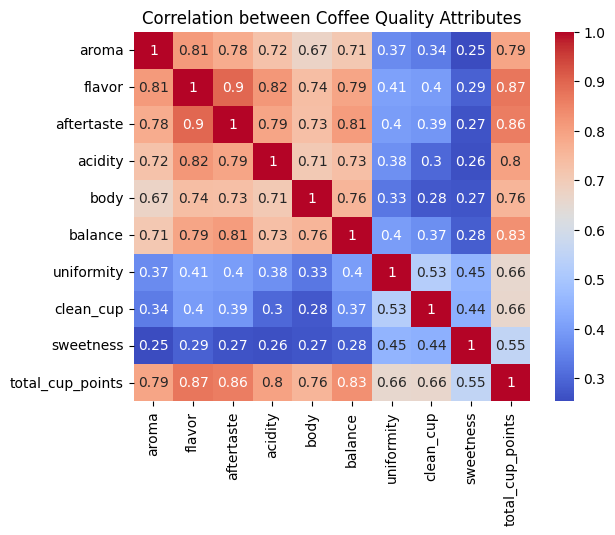

In [39]:
# Create correlation matrix for numerical columns (focusing on coffee qualities)
quality_cols = ['aroma', 'flavor', 'aftertaste', 'acidity', 'body',
       'balance', 'uniformity', 'clean_cup', 'sweetness', 'total_cup_points']
correlation_matrix = df[quality_cols].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Coffee Quality Attributes')

### Altitude versus total cup points

Text(0.5, 1.0, 'Altitude vs Total Cup Points')

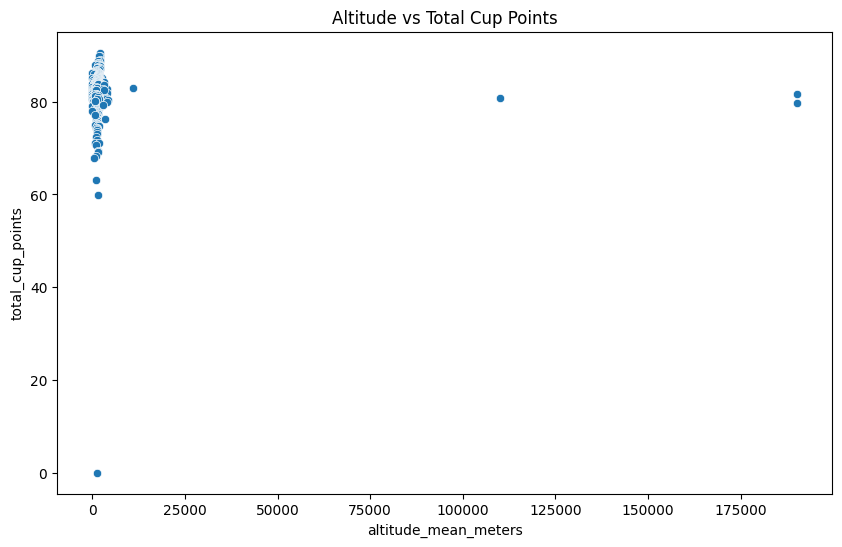

In [40]:
# Analyze relationship between altitude and coffee quality
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='altitude_mean_meters', y='total_cup_points')
plt.title('Altitude vs Total Cup Points')

### Quality scores by processing method

Text(0.5, 1.0, 'Quality Scores by Processing Method')

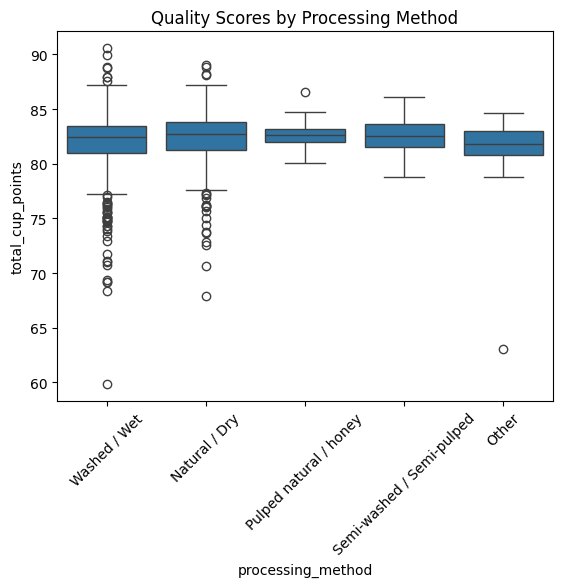

In [41]:
# Compare quality scores across processing methods
sns.boxplot(data=df, x='processing_method', y='total_cup_points')
plt.xticks(rotation=45)
plt.title('Quality Scores by Processing Method')

In [42]:
# Average scores by region
avg_by_region = df.groupby('region')['total_cup_points'].mean().sort_values(ascending=False)
print("\nAverage Scores by Region:")
print(avg_by_region)


Average Scores by Region:
region
guji-hambela                       89.776667
snnp/kaffa zone,gimbowereda        88.250000
oromiya                            88.125000
sulawesi                           87.420000
gedio                              87.250000
                                     ...    
marmelade                          72.330000
tlatlauquitepec                    71.080000
sierra norte yajalon, chiapas      70.750000
juchique de ferrer                 68.330000
department d'artibonite , haiti    67.920000
Name: total_cup_points, Length: 356, dtype: float64


### Average total cup points over the years

Original unique values:
['08/09 crop', '1T/2011', '1t/2011', '2009 - 2010', '2009 / 2010', '2009-2010', '2009/2010', '2010', '2010-2011', '2011', '2011/2012', '2012', '2013', '2013/2014', '2014', '2014/2015', '2015', '2015/2016', '2016', '2016 / 2017', '2016/2017', '2017', '2017 / 2018', '2018', '23 July 2010', '3T/2011', '47/2010', '4T/10', '4T/2010', '4T72010', '4t/2010', '4t/2011', 'Abril - Julio', 'Abril - Julio /2011', 'August to December', 'December 2009-March 2010', 'Fall 2009', 'January 2011', 'January Through April', 'March 2010', 'May-August', 'Mayo a Julio', 'Sept 2009 - April 2010', 'Spring 2011 in Colombia.', 'TEST', 'mmm']

Standardized unique values:
[np.float64(2009.0), np.float64(2010.0), np.float64(2011.0), np.float64(2012.0), np.float64(2013.0), np.float64(2014.0), np.float64(2015.0), np.float64(2016.0), np.float64(2017.0), np.float64(2018.0)]


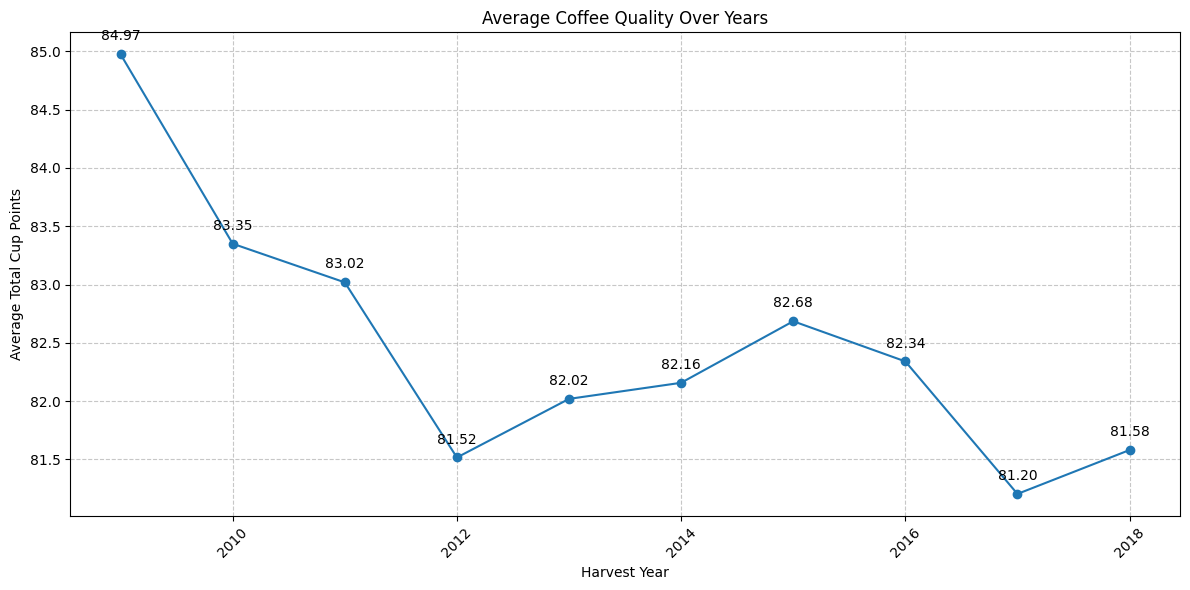


Number of entries per year:
harvest_year_standardized
2009.0     20
2010.0     30
2011.0     36
2012.0    354
2013.0    210
2014.0    252
2015.0    157
2016.0    131
2017.0     89
2018.0      1
Name: count, dtype: int64

Number of NaN values: 59


In [56]:
import pandas as pd
import numpy as np
import re

def standardize_harvest_year(year_str):
    if pd.isna(year_str):
        return np.nan
    
    # Convert to string in case it's already a number
    year_str = str(year_str).strip()
    
    # Simple year pattern (2000-2099)
    year_pattern = r'20[0-9]{2}'
    
    # Cases like '2009/2010' or '2009-2010' or '2009 - 2010'
    split_year_pattern = r'20[0-9]{2}[\s/\-]+20[0-9]{2}'
    
    # If it's a simple year, return it
    if re.match(r'^' + year_pattern + '$', year_str):
        return int(year_str)
    
    # If it's a split year pattern, take the first year
    elif re.match(split_year_pattern, year_str):
        return int(re.findall(year_pattern, year_str)[0])
    
    # Handle specific cases like '4T/10' or '1T/2011'
    elif '/10' in year_str or '/2010' in year_str:
        return 2010
    elif '/11' in year_str or '/2011' in year_str:
        return 2011
    
    # If there's any year in the string, extract the first one
    elif re.search(year_pattern, year_str):
        return int(re.findall(year_pattern, year_str)[0])
    
    # For all other cases, return NaN
    return np.nan

# Create a new column with standardized years
df['harvest_year_standardized'] = df['harvest_year'].apply(standardize_harvest_year)

# Display unique values before and after standardization
print("Original unique values:")
original_values = df['harvest_year'].unique()
# Filter out NaN values for sorting strings
string_values = [str(x) for x in original_values if pd.notna(x)]
print(sorted(string_values))

print("\nStandardized unique values:")
standardized_values = df['harvest_year_standardized'].unique()
# Filter out NaN values for sorting numbers
number_values = [x for x in standardized_values if pd.notna(x)]
print(sorted(number_values))

# Now we can create the time series plot with standardized years
yearly_avg = df.groupby('harvest_year_standardized')['total_cup_points'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
yearly_avg.plot(kind='line', marker='o')
plt.title('Average Coffee Quality Over Years')
plt.xlabel('Harvest Year')
plt.ylabel('Average Total Cup Points')
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add value labels
for x, y in yearly_avg.items():
    plt.annotate(f'{y:.2f}', 
                (x, y), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

plt.tight_layout()
plt.show()

# Print some statistics
print("\nNumber of entries per year:")
print(df['harvest_year_standardized'].value_counts().sort_index())
print("\nNumber of NaN values:", df['harvest_year_standardized'].isna().sum())

In [54]:
df['harvest_year_standardized']

0       2014.0
1       2014.0
2          NaN
3       2014.0
4       2014.0
         ...  
1334    2016.0
1335    2016.0
1336    2014.0
1337    2013.0
1338    2013.0
Name: harvest_year_standardized, Length: 1339, dtype: float64

Text(0.5, 1.0, 'Impact of Category One Defects on Coffee Quality')

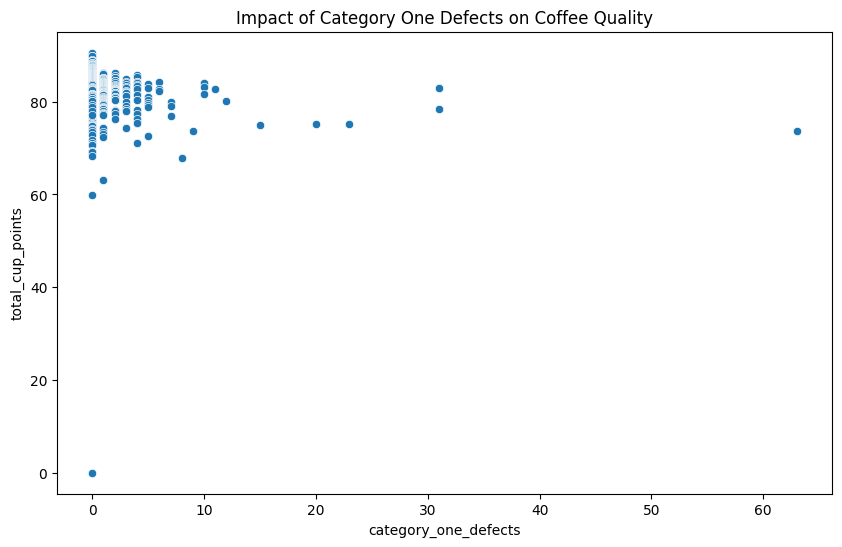

In [58]:
# Analyze impact of defects on quality
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category_one_defects', y='total_cup_points')
plt.title('Impact of Category One Defects on Coffee Quality')

Text(0.5, 1.0, 'Impact of Category One Defects on Coffee Quality')

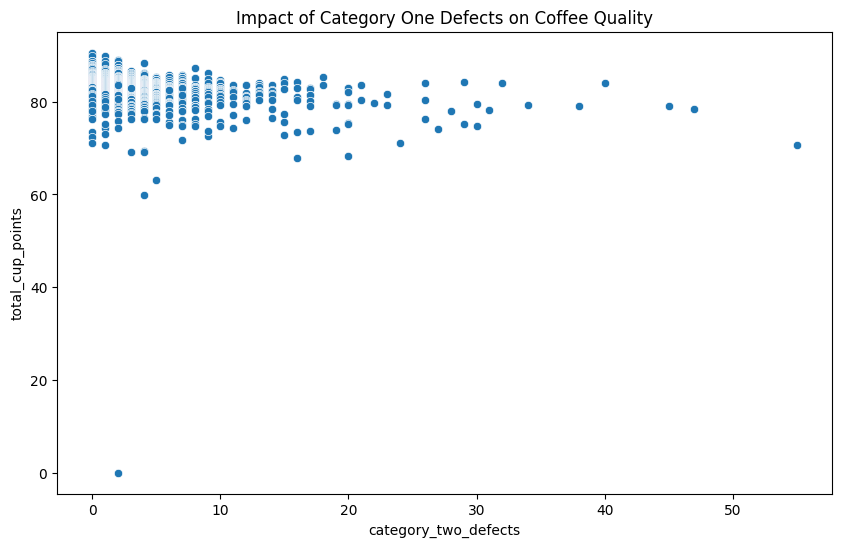

In [59]:
# Analyze impact of defects on quality
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category_two_defects', y='total_cup_points')
plt.title('Impact of Category One Defects on Coffee Quality')